In [1]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scripts import bookdatafunctions as bdf
from pprint import pprint
from collections import Counter

In [2]:
#Constants
#Change these and some of the code blocks if you want to view the versions with features!
AGE_FOLDER = "Data/ages_csv/"
GROUPS_FOLDER = "Data/groups_csv/"
REGISTERS_FOLDER = "Data/genres_csv/"
WHOLE_FOLDER = "Data/whole_csv/"
SHEET_NAMES_AGES = ['5','6','7','8','9','10','11','12','13','14','15']
SHEET_NAMES_GROUPS = ['7-8','9-12','13+']
SHEET_NAMES_REGISTERS = ['Fiction', 'Nonfiction', 'Textbook']
WHOLE = ['Whole']
UPOS_TAGS = {'ADJ','ADP','ADV','AUX','CCONJ','INTJ','NOUN','NUM','PRON','PROPN','PUNCT','SCONJ','SYM','VERB'}

In [3]:
#Read CSV-files into dictionaries
dfs_ages = {}
for sheet in SHEET_NAMES_AGES:
     dfs_ages[sheet] = pd.read_csv(AGE_FOLDER+sheet+".csv", sep=';', keep_default_na=False)
dfs_groups = {}
for sheet in SHEET_NAMES_GROUPS:
     dfs_groups[sheet] = pd.read_csv(GROUPS_FOLDER+sheet+".csv", sep=';', keep_default_na=False)
dfs_registers = {}
for sheet in SHEET_NAMES_REGISTERS:
     dfs_registers[sheet] = pd.read_csv(REGISTERS_FOLDER+sheet+".csv", sep=';', keep_default_na=False)
dfs_whole = {}
dfs_whole['Whole'] = pd.read_csv(WHOLE_FOLDER+"Whole.csv", sep=';', keep_default_na=False)

In [4]:
#Column names of the CSV-files
print(list(dfs_ages.values())[0].columns)

Index(['text', 'lemma', 'upos', 'Word-POS F', 'Word F', 'Word CD', 'Word D',
       'Word U', 'Word SFI', 'Word Zipf', 'Lemma F', 'Lemma CD', 'Lemma D',
       'Lemma U', 'Lemma SFI', 'Lemma Zipf', 'Lemma IFS', 'Word Syllables',
       'Word Length', 'Lemma Length', 'Word FSA', 'Lemma FSA'],
      dtype='object')


# Raw frequencies

In [5]:
#Print out raw frequency statistics displayed in Tables 2, 3, and 4 of the original paper
def formatRawFrequencyTable(dfs, names):
    dfs = dfs.copy()
    returnable = {}
    #Use this if you're viewing CSV files with features
    #word_amounts = {sheet:dfs[sheet].drop_duplicates(['text','upos+features'])['Word-POS+FEATS F'].sum() for sheet in names}
    word_amounts = {sheet:dfs[sheet].drop_duplicates(['text','upos'])['Word-POS F'].sum() for sheet in names}
    word_types = {sheet:len(dfs[sheet]['text'].drop_duplicates()) for sheet in names}
    hapax_words = {sheet:len(dfs[sheet][dfs[sheet]['Word F'] == 1].drop_duplicates('text')) for sheet in names}
    lemma_types = {sheet:len(dfs[sheet]['lemma'].drop_duplicates()) for sheet in names}
    hapax_lemmas = {sheet:len(dfs[sheet][dfs[sheet]['Lemma F'] == 1].drop_duplicates('lemma')) for sheet in names}
    for sheet in names:
        returnable[sheet] = str(sheet)+" & "+str(word_amounts[sheet])+" & "+str(word_types[sheet])+" & "+str(hapax_words[sheet])+" & "+str(lemma_types[sheet])+" \\\\"+str(hapax_lemmas[sheet])
    return returnable

In [6]:
temp = list(formatRawFrequencyTable(dfs_ages, SHEET_NAMES_AGES).values())
#temp.sort()
for i in temp:
    print("Age "+i)

Age 5 & 264916 & 51893 & 34664 & 23619 \\13800
Age 6 & 359346 & 58280 & 36711 & 23782 \\12812
Age 7 & 805586 & 105176 & 64827 & 42854 \\23438
Age 8 & 956309 & 110369 & 67235 & 44150 \\23628
Age 9 & 1762154 & 166520 & 97659 & 63513 \\33843
Age 10 & 502469 & 74495 & 46821 & 30202 \\16223
Age 11 & 299504 & 53351 & 33208 & 22794 \\12093
Age 12 & 1401351 & 146708 & 88855 & 55921 \\29990
Age 13 & 935010 & 122702 & 76161 & 49149 \\26844
Age 14 & 2542212 & 219122 & 129892 & 83816 \\45284
Age 15 & 1764020 & 182214 & 109824 & 70213 \\38154


In [7]:
temp = list(formatRawFrequencyTable(dfs_groups, SHEET_NAMES_GROUPS).values())
#temp.sort()
for i in temp:
    print("Age "+i)

Age 7-8 & 2386157 & 221327 & 132937 & 88358 \\49051
Age 9-12 & 3965478 & 297538 & 172221 & 112894 \\60778
Age 13+ & 5241242 & 367494 & 214054 & 140515 \\76899


In [8]:
temp = list(formatRawFrequencyTable(dfs_registers, SHEET_NAMES_REGISTERS).values())
#temp.sort()
for i in temp:
    print(i)

Fiction & 10142893 & 514182 & 292582 & 195892 \\107676
Nonfiction & 942972 & 159091 & 102369 & 68222 \\39699
Textbook & 507012 & 86053 & 52334 & 38186 \\20717


In [9]:
temp = list(formatRawFrequencyTable(dfs_whole, WHOLE).values())
#temp.sort()
for i in temp:
    print(i)

Whole & 11592877 & 620614 & 356779 & 243332 \\136151


In [10]:

df = dfs_whole['Whole'].copy()

hapax_lemmas = df[df['Lemma F'] == 1].drop_duplicates('lemma')
hapax_lemmas_exc_etc = df[(df['Lemma F'] == 1) & (df['upos'] != "PUNCT") & (df['upos'] != "SYM") & (df['upos'] != "X") & (df['upos'] != "_")].drop_duplicates('lemma')

print(len(hapax_lemmas))
print(len(hapax_lemmas_exc_etc))

136151
134060


In [11]:
hapax_lemma_multi_word = df[(df['Lemma F'] == 1) & (df['Word F'] > 1) & (df['Word-POS F'] < 10)].drop_duplicates('lemma')
for i in range(len(hapax_lemma_multi_word)):
    print("Word: ",hapax_lemma_multi_word.iloc[i]['text']," and Lemma: ",hapax_lemma_multi_word.iloc[i]['lemma'])
print(len(hapax_lemma_multi_word))

Word:  2.0:n  and Lemma:  2.0:n
Word:  20-64-vuotiaista  and Lemma:  20#64#vuotias
Word:  20-64-vuotiaista  and Lemma:  20#64#vuotiainen
Word:  202 mk  and Lemma:  202 mk
Word:  202 mk  and Lemma:  202 m8
Word:  213 mk  and Lemma:  213 mk
Word:  21:7  and Lemma:  21:7
Word:  2:n  and Lemma:  2:n
Word:  4\times4  and Lemma:  4\times4
Word:  4\times4  and Lemma:  4tiin
Word:  9  and Lemma:  T : 9
Word:  A-anteeksi  and Lemma:  A#anne
Word:  AAPO  and Lemma:  AAPO
Word:  AFRIKANNORSU  and Lemma:  AFRIKANNORSU
Word:  AFRIKANNORSU  and Lemma:  anrikko#norsu
Word:  AHDISTUNUT  and Lemma:  ahdistuout
Word:  AIHEUTTAA  and Lemma:  aiheutta
Word:  AIHEUTTI  and Lemma:  aiheutti
Word:  AIKAMME  and Lemma:  aikamхee
Word:  AIKANSA  and Lemma:  AikanSa
Word:  AIKUISET  and Lemma:  aikuiset
Word:  AINA  and Lemma:  aintaa
Word:  AINE  and Lemma:  AINE
Word:  AINOITA  and Lemma:  ainoitta
Word:  AITO  and Lemma:  AITO
Word:  AIVAN  and Lemma:  aivat
Word:  AJA  and Lemma:  AJA
Word:  AJATTELE  and L

# POS-tags

In [12]:
#Function for formatting text to get a POS proportion table as in the original paper
#Edit this if you want to view the versions with features
def formatPOSProportions(dfs, names):
    returnable = {}
    word_amounts = {sheet:dfs[sheet]['Word-POS F'].sum() for sheet in names}
    for tag in UPOS_TAGS:
        text = tag+" "
        for sheet in names:
            df = dfs[sheet]
            text += "& "+str(round(((df[df['upos'] == tag]['Word-POS F'].sum())/word_amounts[sheet])*100, ndigits=1))+" "
        returnable[tag] = text+"\\\\"
    return returnable

In [13]:
#For age groups
temp = list(formatPOSProportions(dfs_groups, SHEET_NAMES_GROUPS).values())
temp.sort()
for i in temp:
    print(i)

ADJ & 5.6 & 5.1 & 5.2 \\
ADP & 1.4 & 1.4 & 1.4 \\
ADV & 9.1 & 9.2 & 8.9 \\
AUX & 6.4 & 6.8 & 7.1 \\
CCONJ & 3.9 & 3.8 & 4.0 \\
INTJ & 0.4 & 0.3 & 0.4 \\
NOUN & 19.5 & 19.1 & 18.4 \\
NUM & 0.7 & 0.7 & 0.6 \\
PRON & 9.7 & 10.2 & 10.7 \\
PROPN & 4.9 & 4.2 & 4.2 \\
PUNCT & 19.7 & 19.6 & 20.1 \\
SCONJ & 2.3 & 2.5 & 2.6 \\
SYM & 0.0 & 0.6 & 0.4 \\
VERB & 16.1 & 16.3 & 15.9 \\


In [14]:
#For whole lexicon
temp = list(formatPOSProportions(dfs_whole, WHOLE).values())
temp.sort()
for i in temp:
    print(i)

ADJ & 5.2 \\
ADP & 1.4 \\
ADV & 9.0 \\
AUX & 7.0 \\
CCONJ & 4.0 \\
INTJ & 0.4 \\
NOUN & 18.8 \\
NUM & 0.6 \\
PRON & 10.6 \\
PROPN & 4.3 \\
PUNCT & 19.8 \\
SCONJ & 2.5 \\
SYM & 0.4 \\
VERB & 15.9 \\


# Other statistical data

In [53]:
#Function for outputting text for any wanted statistic in TCBLex as displayed in the original paper
STATISTICAL_TABLE_ROWs = ['M', 'SD', 'Min', 'P10', 'P25', 'P50', 'P75', 'P90', 'Max']
def formatStatisticalDataTypeLevel(dfs, column: str, names, table_format: bool=True, ignore_non_word: bool=False, ignore_len_one: bool=False):
    temp = {}
    duplicate_row = 'text'
    if column.find('Lemma') != -1:
        duplicate_row = 'lemma'
    for sheet in names:
        stats = []
        df = dfs[sheet]
        if ignore_non_word:
            df = df[(df.upos != "PUNCT") & (df.upos != "SYM") & (df["upos"] != "X") & (df["upos"] != "_")& (df.upos != "NUM")]
        if ignore_len_one:
            df = df[df["Word Length"] > 1]
        data = df.drop_duplicates(duplicate_row)[column].to_numpy()
        stats.append(round(np.mean(data), ndigits=3))
        stats.append(np.std(data))
        stats.append(np.min(data))
        stats.append(np.percentile(data, 10))
        stats.append(np.percentile(data, 25))
        stats.append(np.percentile(data, 50))
        stats.append(np.percentile(data, 75))
        stats.append(np.percentile(data, 90))
        stats.append(np.max(data))
        temp[sheet] = stats
    returnable = {}
    for i in range(len(STATISTICAL_TABLE_ROWs)):
        stats = []
        for sheet in names:
            stats.append(temp[sheet][i])
        if table_format:
            stats = [str(round(x, ndigits=3)) for x in stats]
            returnable[STATISTICAL_TABLE_ROWs[i]] = (STATISTICAL_TABLE_ROWs[i]+" & "+" & ".join(stats) + " \\\\")
        else:
            return temp
        
    return returnable
#Same function but for getting data on a token level
#In practice, adds to calculations the wanted stat per column, but times it by the frequency
#This way, very frequent words like "ja" (Finnish for "and") get counted multiple times and pull down the average length of words
#Basically only meant to be used with "Length", but can be used for the other statistics as well (although not adviced and will generally yield nonsense)
def formatStatisticalDataTokenLevel(dfs, column: str, names, table_format: bool=True, ignore_non_word: bool=False, ignore_len_one: bool=False):
    temp = {}
    duplicate_row = 'text'
    freq_column = "Word F"
    if column.find('Lemma') != -1:
        duplicate_row = 'lemma'
        freq_column = "Lemma F"
    for sheet in names:
        stats = []
        df = dfs[sheet].drop_duplicates(duplicate_row)
        if ignore_non_word:
            df = df[(df["upos"] != "PUNCT") & (df["upos"] != "SYM") & (df["upos"] != "X") & (df["upos"] != "_") & (df.upos != "NUM")].copy()
        if ignore_len_one:
            df = df[df["Word Length"] > 1]
        col_values = [[x] for x in df[column].to_numpy()]
        times = df[freq_column].to_numpy()
        token_level_amounts = [col_values[i]*times[i] for i in range(len(col_values))]
        data = np.concatenate(token_level_amounts)
        stats.append(round(np.mean(data), ndigits=3))
        stats.append(np.std(data))
        stats.append(np.min(data))
        stats.append(np.percentile(data, 10))
        stats.append(np.percentile(data, 25))
        stats.append(np.percentile(data, 50))
        stats.append(np.percentile(data, 75))
        stats.append(np.percentile(data, 90))
        stats.append(np.max(data))
        temp[sheet] = stats
    returnable = {}
    for i in range(len(STATISTICAL_TABLE_ROWs)):
        stats = []
        for sheet in names:
            stats.append(temp[sheet][i])
        if table_format:
            stats = [str(round(x, ndigits=3)) for x in stats]
            returnable[STATISTICAL_TABLE_ROWs[i]] = (STATISTICAL_TABLE_ROWs[i]+" & "+" & ".join(stats) + " \\\\")
        else:
            return temp
        
    return returnable

# Example for word/lemma length on both type and token level, when ignoring words with length less than 2

In [ ]:
#Type level
stat_pulled = "Length"

temp_word_group = list(formatStatisticalDataTypeLevel(dfs_groups, "Word "+stat_pulled, SHEET_NAMES_GROUPS, ignore_len_one=True).values())
temp_word_whole = list(formatStatisticalDataTypeLevel(dfs_whole, "Word "+stat_pulled, WHOLE, ignore_len_one=True).values())
temp_lemma_group = list(formatStatisticalDataTypeLevel(dfs_groups, "Lemma "+stat_pulled, SHEET_NAMES_GROUPS, ignore_len_one=True).values())
temp_lemma_whole = list(formatStatisticalDataTypeLevel(dfs_whole, "Lemma "+stat_pulled, WHOLE, ignore_len_one=True).values())

In [58]:
#Type level
stat_pulled = "Length"

temp_word_group = list(formatStatisticalDataTypeLevel(dfs_groups, "Word "+stat_pulled, SHEET_NAMES_GROUPS, ignore_len_one=True).values())
temp_word_whole = list(formatStatisticalDataTypeLevel(dfs_whole, "Word "+stat_pulled, WHOLE, ignore_len_one=True).values())
temp_lemma_group = list(formatStatisticalDataTokenLevel(dfs_groups, "Word "+stat_pulled, SHEET_NAMES_GROUPS, ignore_len_one=True).values())
temp_lemma_whole = list(formatStatisticalDataTokenLevel(dfs_whole, "Word "+stat_pulled, WHOLE, ignore_len_one=True).values())

In [59]:
#Helper loop for outputting Latex-friendly data
for i in range(len(temp_word_group)):
    w_g = temp_word_group[i]
    w_w = temp_word_whole[i]
    l_g = temp_lemma_group[i]
    l_w = temp_lemma_whole[i]
    to_print = w_w[:-2]+w_g[w_g.find('&'):-2]+l_w[l_w.find('&'):-2]+l_g[l_w.find('&'):]
    print(to_print)

M & 10.979 & 10.14 & 10.43 & 10.709 & 6.395 & 6.37 & 6.403 & 6.401 \\
SD & 3.663 & 3.4 & 3.463 & 3.628 & 3.103 & 3.052 & 3.082 & 3.142 \\
Min & 2 & 2 & 2 & 2 & 2 & 2 & 2 & 2 \\
P10 & 7.0 & 6.0 & 6.0 & 6.0 & 3.0 & 3.0 & 3.0 & 3.0 \\
P25 & 8.0 & 8.0 & 8.0 & 8.0 & 4.0 & 4.0 & 4.0 & 4.0 \\
P50 & 11.0 & 10.0 & 10.0 & 10.0 & 6.0 & 6.0 & 6.0 & 6.0 \\
P75 & 13.0 & 12.0 & 12.0 & 13.0 & 8.0 & 8.0 & 8.0 & 8.0 \\
P90 & 16.0 & 14.0 & 15.0 & 15.0 & 11.0 & 10.0 & 11.0 & 11.0 \\
Max & 69 & 69 & 42 & 50 & 69 & 69 & 42 & 50 \\


In [56]:
#Token level
temp_word_group = list(formatStatisticalDataTokenLevel(dfs_groups, "Word "+stat_pulled, SHEET_NAMES_GROUPS, ignore_len_one=True).values())
temp_word_whole = list(formatStatisticalDataTokenLevel(dfs_whole, "Word "+stat_pulled, WHOLE, ignore_len_one=True).values())
temp_lemma_group = list(formatStatisticalDataTokenLevel(dfs_groups, "Lemma "+stat_pulled, SHEET_NAMES_GROUPS, ignore_len_one=True).values())
temp_lemma_whole = list(formatStatisticalDataTokenLevel(dfs_whole, "Lemma "+stat_pulled, WHOLE, ignore_len_one=True).values())

In [57]:
#Helper loop for outputting Latex-friendly data
for i in range(len(temp_word_group)):
    w_g = temp_word_group[i]
    w_w = temp_word_whole[i]
    l_g = temp_lemma_group[i]
    l_w = temp_lemma_whole[i]
    to_print = w_w[:-2]+w_g[w_g.find('&'):-2]+l_w[l_w.find('&'):-2]+l_g[l_w.find('&'):]
    print(to_print)

M & 6.395 & 6.37 & 6.403 & 6.401 & 5.64 & 5.635 & 5.647 & 5.636 \\
SD & 3.103 & 3.052 & 3.082 & 3.142 & 2.725 & 2.69 & 2.704 & 2.757 \\
Min & 2 & 2 & 2 & 2 & 1 & 1 & 1 & 1 \\
P10 & 3.0 & 3.0 & 3.0 & 3.0 & 3.0 & 3.0 & 3.0 & 3.0 \\
P25 & 4.0 & 4.0 & 4.0 & 4.0 & 4.0 & 4.0 & 4.0 & 4.0 \\
P50 & 6.0 & 6.0 & 6.0 & 6.0 & 5.0 & 5.0 & 5.0 & 5.0 \\
P75 & 8.0 & 8.0 & 8.0 & 8.0 & 7.0 & 7.0 & 7.0 & 7.0 \\
P90 & 11.0 & 10.0 & 11.0 & 11.0 & 9.0 & 9.0 & 9.0 & 9.0 \\
Max & 69 & 69 & 42 & 50 & 52 & 52 & 44 & 50 \\


# Example for word/lemma length on token level when excluding punctuation, symbols, and other non-word-like POS tags AND words with length of one
Note that due to rare parsing mistakes, excluding based on POS tags might not catch all wanted non-words.
For example, full stop might be correctly tagged as PUNCT in 99.9% of cases, yet be mistakenly tagged as AUX once meaning it is not fully excluded

In [46]:
#Token level
stat = "Length"

temp_word_group = list(formatStatisticalDataTokenLevel(dfs_groups, "Word "+stat_pulled, SHEET_NAMES_GROUPS, ignore_non_word=True, ignore_len_one=True).values())
temp_word_whole = list(formatStatisticalDataTokenLevel(dfs_whole, "Word "+stat_pulled, WHOLE, ignore_non_word=True, ignore_len_one=True).values())
temp_lemma_group = list(formatStatisticalDataTokenLevel(dfs_groups, "Lemma "+stat_pulled, SHEET_NAMES_GROUPS, ignore_non_word=True, ignore_len_one=True).values())
temp_lemma_whole = list(formatStatisticalDataTokenLevel(dfs_whole, "Lemma "+stat_pulled, WHOLE, ignore_non_word=True, ignore_len_one=True).values())

In [49]:
#Helper loop for outputting Latex-friendly data
for i in range(len(temp_word_group)):
    w_g = temp_word_group[i]
    w_w = temp_word_whole[i]
    #l_g = temp_lemma_group[i]
    #l_w = temp_lemma_whole[i]
    to_print = w_w[:-2]+w_g[w_g.find('&'):]
    print(to_print)

M & 6.517 & 6.379 & 6.446 & 6.448 \\
SD & 3.063 & 3.052 & 3.074 & 3.133 \\
Min & 2 & 2 & 2 & 2 \\
P10 & 3.0 & 3.0 & 3.0 & 3.0 \\
P25 & 4.0 & 4.0 & 4.0 & 4.0 \\
P50 & 6.0 & 6.0 & 6.0 & 6.0 \\
P75 & 8.0 & 8.0 & 8.0 & 8.0 \\
P90 & 11.0 & 10.0 & 11.0 & 11.0 \\
Max & 69 & 69 & 42 & 49 \\


### Unused table for the article on word lengths for the entire lexicon, with potential for adding statistics on OLD20/other ortographic neighborhood metrics

In [ ]:
import re
from tqdm import tqdm
import itertools
specials = {'[':"§", ']':"§", '.': "§", '^': "§", '$': "§", '*': "§", '+': "§", '?': "§", '{': "§", '}':"§", '|':"§", '(':"§", ')':"§"}
specials_dict = str.maketrans(specials)

#Unused function for calculating Coltheart's N for words
def countNeighbors(word, corpus):
    word = word.strip()
    word = word.lower()
    word = word.replace("\\", "§")
    #Get rid of special characters
    word = word.translate(specials_dict)
    nlet = len(word)
    pat = '|'.join(['^'+word[0:i]+'[\w]'+word[i+1:nlet]+'$' for i in range(nlet)])
    m=re.compile(pat,re.UNICODE)
    f = lambda x: re.match(m, x) and x!=word
    matches = np.array(list(itertools.filterfalse(lambda x: x is None, map(f, corpus))), dtype=bool)
    return matches.sum()
def countNeighborsForWordList(wordlist, corpus, n):
    returnable = []
    with tqdm(range(len(wordlist)), desc="Processing words of length "+str(n)) as pbar:
        for word in wordlist:
            returnable.append(countNeighbors(word, corpus))
            pbar.update(1)
    return returnable

In [ ]:
"""
whole_df = dfs_whole['Whole']
temp_whole_df = whole_df.drop_duplicates('text')
token_counts = {x:np.sum(temp_whole_df[temp_whole_df['Word Length'] == x]['Word F'].to_numpy()) for x in range(1,21)}
token_counts[21] = np.sum(temp_whole_df[temp_whole_df['Word Length'] > 20]['Word F'].to_numpy())
mean_Zipf = {x:round(np.mean(temp_whole_df[temp_whole_df['Word Length'] == x]['Word Zipf'].to_numpy()), ndigits=2) for x in range(1,21)}
mean_Zipf[21] = round(np.mean(temp_whole_df[temp_whole_df['Word Length'] > 20]['Word Zipf'].to_numpy()), ndigits=2)
SD_Zipf = {x:round(np.std(temp_whole_df[temp_whole_df['Word Length'] == x]['Word Zipf'].to_numpy()), ndigits=2) for x in range(1,21)}
SD_Zipf[21] = round(np.std(temp_whole_df[temp_whole_df['Word Length'] > 20]['Word Zipf'].to_numpy()), ndigits=2) 
table_8 = pd.DataFrame(whole_df.drop_duplicates('text').value_counts(['Word Length']))
new_index = [x[0] for x in table_8.index]
table_8.index = new_index
table_8['Token count'] = pd.Series(token_counts)
table_8['Mean Zipf'] = pd.Series(mean_Zipf)
table_8['SD Zipf'] = pd.Series(SD_Zipf)
print(table_8.sort_index())
"""

    count  Token count  Mean Zipf  SD Zipf
1     208    2351046.0       3.32     1.25
2    1016     868947.0       2.82     0.79
3    3557     657803.0       2.65     0.65
4    7963    1096359.0       2.73     0.71
5   17713    1429027.0       2.75     0.69
6   29477    1347379.0       2.73     0.63
7   40339     947936.0       2.64     0.55
8   58809     889151.0       2.58     0.49
9   64111     626238.0       2.51     0.43
10  72206     444689.0       2.45     0.37
11  73021     335381.0       2.41     0.32
12  62184     206239.0       2.37     0.28
13  53280     142927.0       2.34     0.25
14  41069      94307.0       2.32     0.22
15  29823      57262.0       2.30     0.19
16  21514      36862.0       2.28     0.17
17  14626      21960.0       2.27     0.15
18  10036      14386.0       2.26     0.14
19   6804       8952.0       2.25     0.12
20   4499       5928.0       2.25     0.11
21   2892      10098.0       2.24     0.09
22   1939          NaN        NaN      NaN
23   1203  

# Example for syllable amounst on both type and token level when excluding non-word POS tags

In [213]:
#Example for Word Syllable on type level
stat = "Word Syllables"
temp_word_group = list(formatStatisticalDataTypeLevel(dfs_groups, stat, SHEET_NAMES_GROUPS, ignore_non_word=True).values())
temp_word_whole = list(formatStatisticalDataTypeLevel(dfs_whole, stat, WHOLE, ignore_non_word=True).values())

In [214]:
#Helper loop for outputting Latex-friendly data
for i in range(len(temp_word_group)):
    w_g = temp_word_group[i]
    w_w = temp_word_whole[i]
    to_print = w_w[:-2]+w_g[w_g.find('&'):]
    print(to_print)

M & 4.314 & 3.968 & 4.093 & 4.205 \\
SD & 1.496 & 1.382 & 1.416 & 1.483 \\
Min & 0 & 0 & 0 & 0 \\
P10 & 3.0 & 2.0 & 2.0 & 3.0 \\
P25 & 3.0 & 3.0 & 3.0 & 3.0 \\
P50 & 4.0 & 4.0 & 4.0 & 4.0 \\
P75 & 5.0 & 5.0 & 5.0 & 5.0 \\
P90 & 6.0 & 6.0 & 6.0 & 6.0 \\
Max & 26 & 26 & 17 & 17 \\


In [215]:
#Example for Word Syllable on token level
stat = "Word Syllables"
temp_word_group = list(formatStatisticalDataTokenLevel(dfs_groups, stat, SHEET_NAMES_GROUPS, ignore_non_word=True).values())
temp_word_whole = list(formatStatisticalDataTokenLevel(dfs_whole, stat, WHOLE, ignore_non_word=True).values())

In [216]:
#Helper loop for outputting Latex-friendly data
for i in range(len(temp_word_group)):
    w_g = temp_word_group[i]
    w_w = temp_word_whole[i]
    to_print = w_w[:-2]+w_g[w_g.find('&'):]
    print(to_print)

M & 2.322 & 2.285 & 2.3 & 2.559 \\
SD & 1.375 & 1.35 & 1.369 & 1.223 \\
Min & 0 & 0 & 0 & 0 \\
P10 & 0.0 & 1.0 & 1.0 & 1.0 \\
P25 & 2.0 & 2.0 & 1.0 & 2.0 \\
P50 & 2.0 & 2.0 & 2.0 & 2.0 \\
P75 & 3.0 & 3.0 & 3.0 & 3.0 \\
P90 & 4.0 & 4.0 & 4.0 & 4.0 \\
Max & 26 & 26 & 17 & 17 \\


# FSA plots

In [191]:
#Function for fetching FSA data from the wanted sublexicon
def getFSAInfo(dfs, lemmas: bool=False, token: bool=False):
    ages_per_sheet = {}
    for sheet in dfs:
        #If using lemmas
        if lemmas:
            sorted_df = dfs[sheet].sort_values('Lemma FSA').drop_duplicates('lemma')
            #If wanting to get token level data
            if token:
                ages = [[x] for x in sorted_df['Lemma FSA'].to_numpy()]
                times = sorted_df['Lemma F'].to_numpy()
                token_level_amounts = [ages[i]*times[i] for i in range(len(ages))]
                ages_per_sheet[sheet] = np.concatenate(token_level_amounts)
            #If wanting to get type level data
            else:
                ages_per_sheet[sheet] = (sorted_df['Lemma FSA'].to_numpy())
        #If using words
        else:
            sorted_df = dfs[sheet].sort_values('Word FSA').drop_duplicates(['text'])
            if token:
                ages = [[x] for x in sorted_df['Word FSA'].to_numpy()]
                times = sorted_df['Word F'].to_numpy()
                token_level_amounts = [ages[i]*times[i] for i in range(len(ages))]
                ages_per_sheet[sheet] = np.concatenate(token_level_amounts)
            else:
                ages_per_sheet[sheet] = (sorted_df['Word FSA'].to_numpy())
    counts = {x:Counter(ages_per_sheet[x]) for x in ages_per_sheet}
    print(counts)
    counts_scaled = {x:{y:round(counts[x][y]/len(ages_per_sheet[x]), ndigits=3) for y in counts[x]} for x in counts}
    print(counts_scaled)
    for s in counts_scaled:
        for a in range(5,16):
            counts_scaled[s].setdefault(a, 0.0)
    print(counts_scaled)
    return counts_scaled

PLOT_AGES = SHEET_NAMES_AGES
PLOT_COLORS = ['lime','royalblue','brown', 'grey','deeppink','lightskyblue','darkorange','indigo','tan','purple','cyan']
import matplotlib as mpl
PLOT_COLORS = list(mpl.color_sequences['petroff10'])
PLOT_COLORS.append(mpl.color_sequences['Paired'][-1])

{'5': Counter({5: 264916}), '6': Counter({5: 288608, 6: 70738}), '7': Counter({5: 638969, 7: 128092, 6: 38525}), '8': Counter({5: 763841, 8: 106230, 6: 45344, 7: 40894}), '9': Counter({5: 1382186, 9: 168529, 6: 107857, 7: 74992, 8: 28590}), '10': Counter({5: 379716, 10: 40853, 6: 37603, 7: 24775, 9: 10394, 8: 9128}), '11': Counter({5: 230925, 11: 23554, 6: 16105, 7: 14573, 9: 7245, 8: 5856, 10: 1246}), '12': Counter({5: 1123772, 12: 102277, 6: 64285, 7: 54932, 9: 23799, 8: 23760, 10: 5001, 11: 3525}), '13': Counter({5: 731791, 13: 67371, 6: 47094, 7: 36842, 9: 18971, 8: 17838, 12: 7315, 11: 3961, 10: 3827}), '14': Counter({5: 1995207, 14: 163004, 6: 142229, 7: 99134, 8: 45910, 9: 43354, 12: 20377, 13: 15525, 10: 9378, 11: 8094}), '15': Counter({5: 1381430, 15: 116087, 6: 82928, 7: 69334, 8: 31518, 9: 31175, 14: 17565, 12: 14307, 13: 9135, 10: 6371, 11: 4170})}
{'5': {5: 1.0}, '6': {5: 0.803, 6: 0.197}, '7': {5: 0.793, 6: 0.048, 7: 0.159}, '8': {5: 0.799, 6: 0.047, 7: 0.043, 8: 0.111}, 

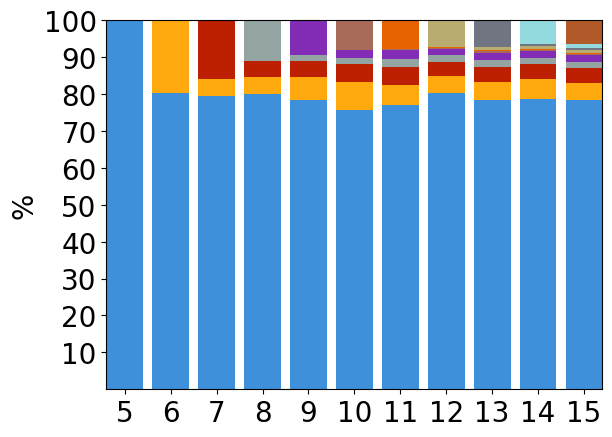

In [192]:
aoa_proportions_ages = getFSAInfo(dfs_ages, False, True)
test = [[aoa_proportions_ages[y][x] for x in range(5,16)] for y in aoa_proportions_ages]
#for t in test:
#    t.reverse()
y = np.column_stack(test)
x = range(5,16)


# Make new array consisting of fractions of column-totals,
# using .astype(float) to avoid integer division
percent = y * 100 
fig = plt.figure()
ax = fig.add_subplot(111)

totals = np.zeros(11)
for i in range(len(percent)):
    current = [y for y in percent[i]]
    ax.bar(x, current, bottom=totals, color=PLOT_COLORS[i])
    totals = np.add(totals, current)


#ax.stackplot(x, percent, labels=PLOT_AGES[::-1], colors=PLOT_COLORS)
#ax.set_title('Age of first appearance for word types within exact ages')
ax.set_ylabel('%', fontsize=20)
ax.margins(0, 0) # Set margins to avoid "whitespace"
ax.set_xticks(x)
ax.set_yticks(range(10,110,10))
ax.tick_params(axis='both', labelsize=20)
#ax.legend(PLOT_AGES[::-1])
plt.show()

{'7-8': Counter({7: 69195, 8: 59650, 5: 51893, 6: 40589}), '9-12': Counter({9: 89462, 12: 61325, 5: 32946, 7: 30108, 10: 26615, 6: 22088, 8: 19196, 11: 15798}), '13+': Counter({14: 94148, 15: 66219, 13: 45720, 5: 33619, 7: 31248, 9: 26661, 6: 22752, 8: 21476, 12: 15009, 10: 6796, 11: 3846})}
{'7-8': {5: 0.234, 6: 0.183, 7: 0.313, 8: 0.27}, '9-12': {5: 0.111, 6: 0.074, 7: 0.101, 8: 0.065, 9: 0.301, 10: 0.089, 11: 0.053, 12: 0.206}, '13+': {5: 0.091, 6: 0.062, 7: 0.085, 8: 0.058, 9: 0.073, 10: 0.018, 11: 0.01, 12: 0.041, 13: 0.124, 14: 0.256, 15: 0.18}}
{'7-8': {5: 0.234, 6: 0.183, 7: 0.313, 8: 0.27, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0}, '9-12': {5: 0.111, 6: 0.074, 7: 0.101, 8: 0.065, 9: 0.301, 10: 0.089, 11: 0.053, 12: 0.206, 13: 0.0, 14: 0.0, 15: 0.0}, '13+': {5: 0.091, 6: 0.062, 7: 0.085, 8: 0.058, 9: 0.073, 10: 0.018, 11: 0.01, 12: 0.041, 13: 0.124, 14: 0.256, 15: 0.18}}


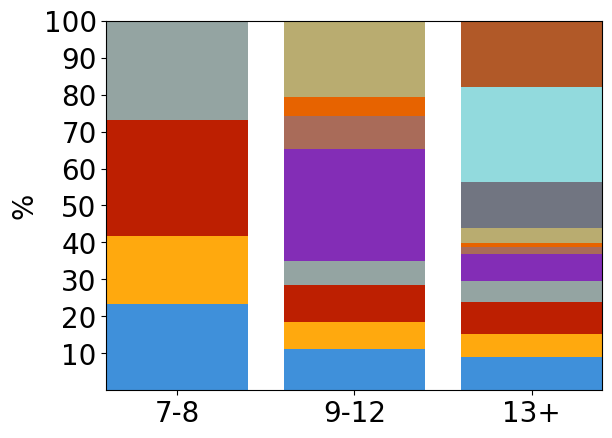

In [193]:
aoa_proportions_groups = getFSAInfo(dfs_groups, False, False)
test = [[aoa_proportions_groups[y][x] for x in range(5,16)] for y in aoa_proportions_groups]
#for t in test:
#    t.reverse()

y = np.column_stack(test)
x = range(0,3)

# Make new array consisting of fractions of column-totals,
# using .astype(float) to avoid integer division
percent = y /  y.sum(axis=0).astype(float) * 100 
fig = plt.figure()
ax = fig.add_subplot(111)
totals = np.zeros(len(x))
for i in range(len(percent)):
    current = [percent[i][y] for y in range(len(x))]
    ax.bar(x, current, bottom=totals, color=PLOT_COLORS[i])
    totals = np.add(totals, current)


#ax.set_title('Age of first appearance for word types within age groups')
ax.set_ylabel('%', fontsize=20)
ax.margins(0, 0) # Set margins to avoid "whitespace"
ax.set_xticks(x, labels=SHEET_NAMES_GROUPS)
ax.set_yticks(range(10,110,10))
ax.tick_params(axis='both', labelsize=20)
plt.show()

{'Whole': Counter({14: 94148, 9: 89462, 7: 69195, 15: 66219, 12: 61325, 8: 59650, 5: 51893, 13: 45720, 6: 40589, 10: 26615, 11: 15798})}
{'Whole': {5: 0.084, 6: 0.065, 7: 0.111, 8: 0.096, 9: 0.144, 10: 0.043, 11: 0.025, 12: 0.099, 13: 0.074, 14: 0.152, 15: 0.107}}
{'Whole': {5: 0.084, 6: 0.065, 7: 0.111, 8: 0.096, 9: 0.144, 10: 0.043, 11: 0.025, 12: 0.099, 13: 0.074, 14: 0.152, 15: 0.107}}


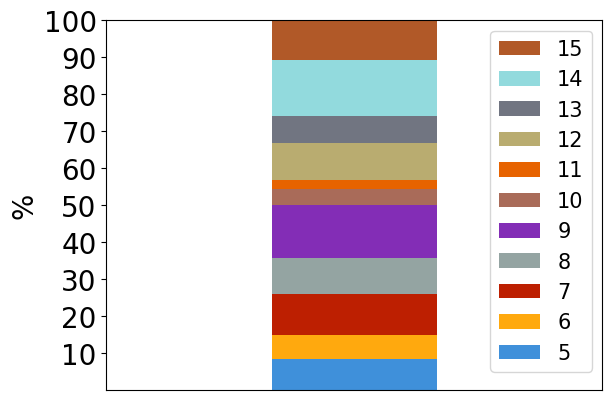

In [194]:
aoa_proportions_whole = getFSAInfo(dfs_whole, False, False)
test = [[aoa_proportions_whole[y][x] for x in range(5,16)] for y in aoa_proportions_whole]

y = np.column_stack(test)
x = range(0,1)

# Make new array consisting of fractions of column-totals,
# using .astype(float) to avoid integer division
percent = y /  y.sum(axis=0).astype(float) * 100 

fig = plt.figure()
ax = fig.add_subplot(111)

totals = np.zeros(len(x))
for i in range(len(percent)):
    current = [percent[i][0]]
    ax.bar(x, current, bottom=totals, color=PLOT_COLORS[i], width=0.5)
    totals = np.add(totals, current)

#ax.set_title('Age of first appearance for word types in TCBLex 1.0')
ax.set_ylabel('%', fontsize=20)
ax.margins(1, 0) # Set margins to avoid "whitespace"
ax.set_yticks(range(10,110,10))
ax.tick_params(axis='both', labelsize=20)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax.legend(reverse=True, labels=PLOT_AGES, loc='upper right', fontsize=15)
plt.show()

# Zipf-values plot

In [195]:
import math
def plot_zipf(data: dict[str,pd.Series], column: str, dupe_col: str):
    fig, axs = plt.subplots(1,len(data))
    keys = list(data.keys())
    y_range = [np.inf,-np.inf]
    x_range = [np.inf,-np.inf]
    
    for i in range(len(keys)):
        x = i
        to_plot = data[keys[i]].drop_duplicates(dupe_col)[column]
        bins = np.linspace(np.min(to_plot), np.max(to_plot), 24) - 0.5
        axs[x].hist(to_plot.to_numpy(), bins=bins, color='#1A85FF')
        #axs[y, x].set_xticks(np.linspace(np.min(to_plot), np.max(to_plot) , 5) - 0.5)
        axs[x].set_title(keys[i], fontsize=20)
        per_50 = np.percentile(to_plot, 50)
        per_75 = np.percentile(to_plot, 75)
        per_90 = np.percentile(to_plot, 90)
        axs[x].axvline(per_50, color='#D41159', linestyle='dashed', linewidth=2, label='50th Percentile')
        #axs[x].axvline(per_75, color='#D41159', linestyle='dashed', linewidth=2, label='75th Percentile')
        axs[x].axvline(per_90, color='#D41159', linestyle='dashed', linewidth=2, label='90th Percentile')
    for ax in axs.flat:
        x_lim = ax.get_xlim()
        y_lim = ax.get_ylim()
        if x_lim[0] < x_range[0]:
            x_range[0] = x_lim[0]
        if x_lim[1] > x_range[1]:
            x_range[1] = x_lim[1]
        if y_lim[0] < y_range[0]:
            y_range[0] = y_lim[0]
        if y_lim[1] > y_range[1]:
            y_range[1] = y_lim[1]
        ax.set_ylim(0,)
        ax.label_outer()

    for ax in axs.flat:
        ax.set_ylim(y_range)
        ax.set_xlim(x_range)
        ax.set_xlim(2,5)
        space = np.linspace(3, 5, 5)
        ax.set_xticks(space - 0.5)
        y_space = np.linspace(50000, 450000, 9, dtype=int)
        ax.set_yticks(y_space)
        ax.tick_params(axis='both', labelsize=20)
        ax.label_outer()
        

    return fig, axs

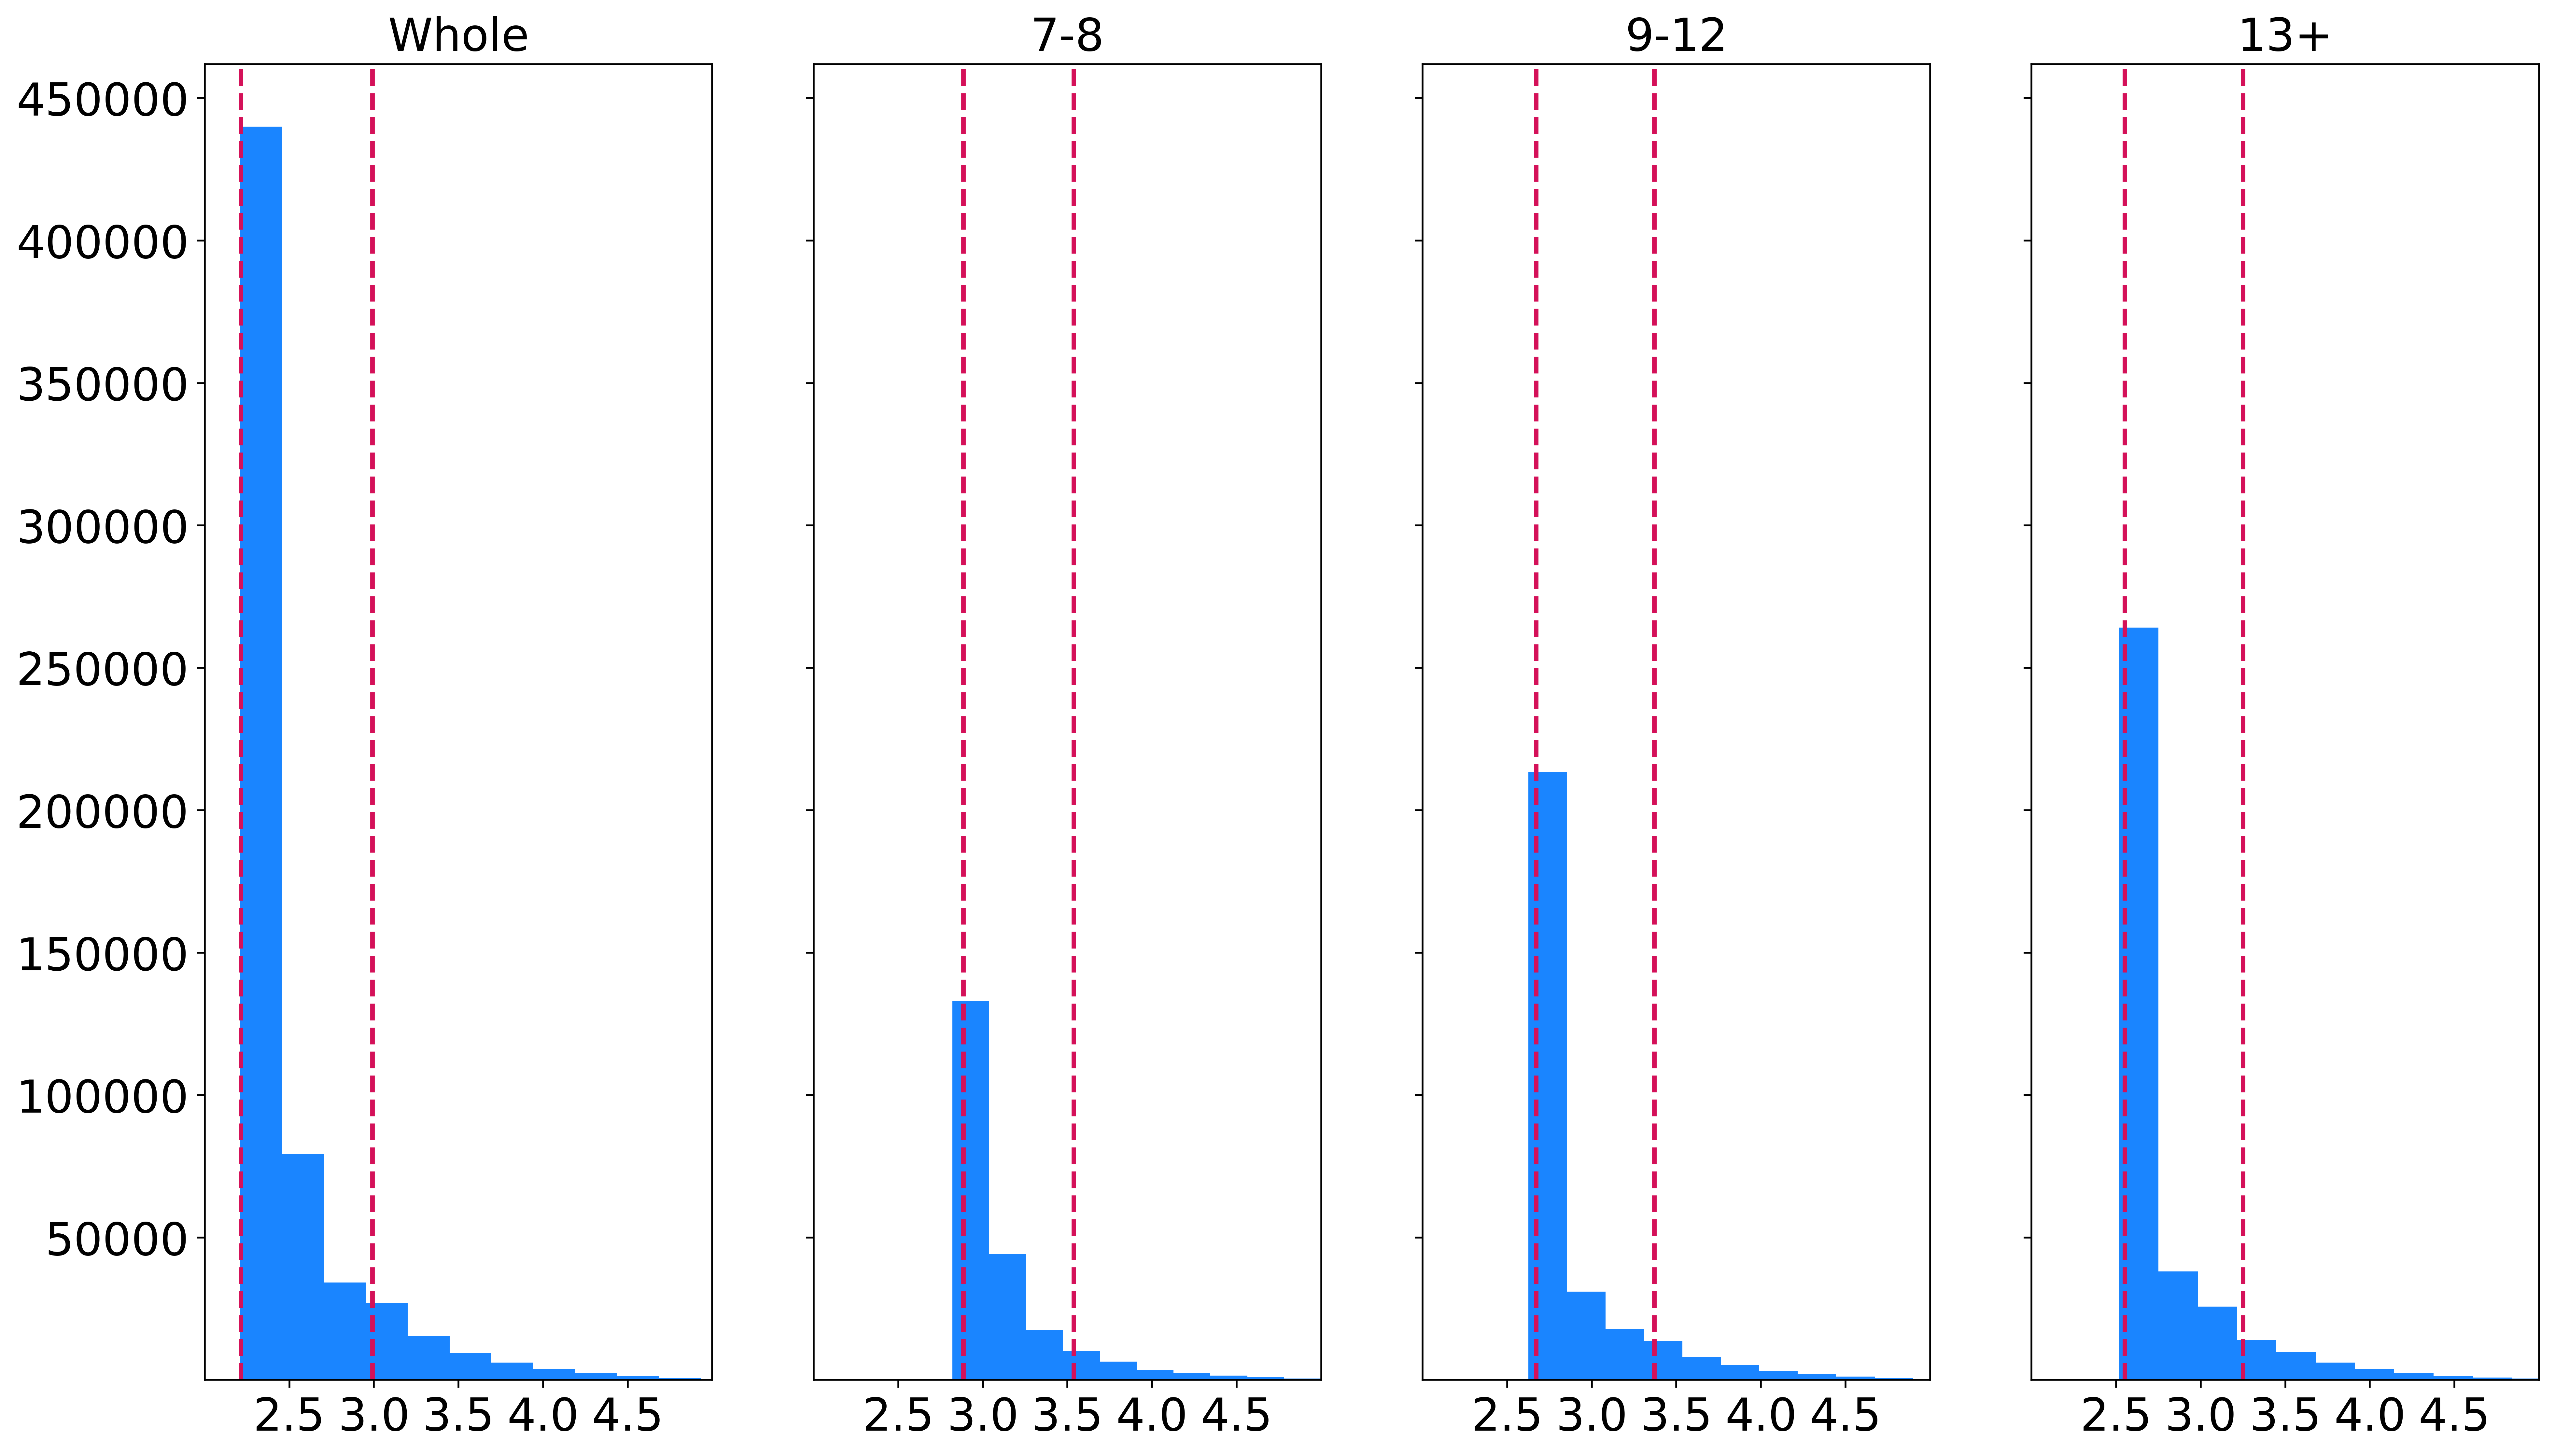

In [196]:
grpwh = bdf.combineSubCorpDicts([dfs_whole, dfs_groups])
fig, axs = plot_zipf(grpwh, 'Word Zipf', 'text')
fig.set_size_inches(18.5, 10.5)
fig.set_dpi(500)

# Morphological paradigm size plot

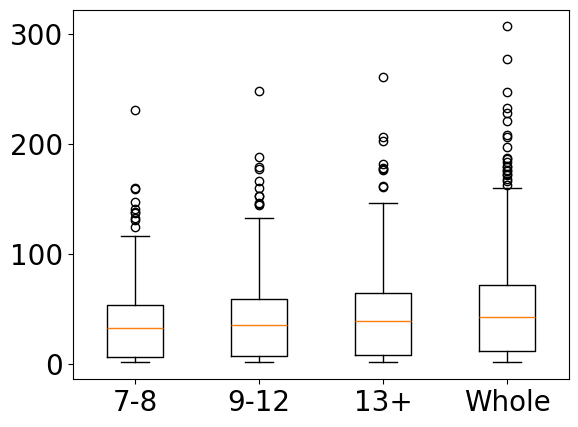

In [ ]:
grpwh = bdf.combineSubCorpDicts([dfs_groups, dfs_whole])

datt = [grpwh[sheet][(grpwh[sheet]['Lemma F'] > np.percentile(grpwh[sheet]['Lemma F'], 90))].drop_duplicates('lemma')['Lemma MPS'].to_numpy() for sheet in grpwh]
plt.boxplot(datt)
plt.xticks([1,2,3,4], labels=list(grpwh.keys()))
plt.tick_params(axis='both', labelsize=20)

# Examples of how to query TCBLex using Pandas

In [198]:
print(len(dfs_whole['Whole'][dfs_whole['Whole']['Word SFI'] > 75].drop_duplicates(['text'])))

18


In [ ]:
print(len(dfs_whole['Whole'][dfs_whole['Whole']['Lemma MPS'] == 1].drop_duplicates(['lemma'])))

164283


In [200]:
#In how many books
print(len(dfs_whole['Whole'].drop_duplicates('lemma')['lemma']))
print(len(dfs_whole['Whole'][dfs_whole['Whole']['Lemma CD'] < 0.005].drop_duplicates('lemma')))
print(len(dfs_whole['Whole'][dfs_whole['Whole']['Lemma CD'] > 0.499].drop_duplicates('lemma')))
print(len(dfs_whole['Whole'][dfs_whole['Whole']['Lemma CD'] > 0.499].drop_duplicates('lemma')) / len(dfs_whole['Whole'].drop_duplicates('lemma')['lemma']))
print(len(dfs_whole['Whole'][dfs_whole['Whole']['Lemma CD'] == 1].drop_duplicates('lemma')))
print(dfs_whole['Whole'][dfs_whole['Whole']['Lemma CD'] == 1].drop_duplicates('lemma')['Lemma F'].sum()/dfs_whole['Whole'].drop_duplicates('lemma')['Lemma F'].sum())

243332
159679
1648
0.00677263985008137
27
0.3396238914636979


In [201]:
print(len(dfs_whole['Whole'][dfs_whole['Whole']['Word CD'] < 0.005].drop_duplicates('text')))
print(len(dfs_whole['Whole'][dfs_whole['Whole']['Word CD'] > 0.499].drop_duplicates('text')))
print(len(dfs_whole['Whole'][dfs_whole['Whole']['Word CD'] == 1].drop_duplicates('text')))
print(dfs_whole['Whole'][dfs_whole['Whole']['Word CD'] == 1].drop_duplicates('text')['Word F'].sum()/dfs_whole['Whole'].drop_duplicates('text')['Word F'].sum())

394208
1950
15
0.23270306413153524
